<a href="https://colab.research.google.com/github/gchaewon/Euron5th_BusTayo/blob/main/EDA_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 날씨 데이터와 버스 승하차 인원 상관 관계 분석

  서울시 버스 승하차 인원 분석에서 월별 날씨가 영향을 미치는지 확인하기 위해 상관 관계 분석 진행

  승하차 인원 데이터는 23년 1월 ~ 12월 데이터를 사용함

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 0. 데이터 로딩

##1) 버스 데이터 로딩 1월 ~ 12월 데이터 불러옴 (전처리된 데이터에서 가져오기)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Euron/프로젝트/'

data_1to8 = pd.read_csv(path+'train.csv')

data_1to8 = data_1to8[data_1to8['month'].between(202301, 202308, inclusive='both')]

data_9to12 = pd.read_csv(path+'test.csv')

data = pd.concat([data_1to8, data_9to12], axis = 1)

In [4]:
data_1to8.shape

(301280, 21)

In [5]:
data_9to12.shape

(167250, 21)

In [6]:
data = pd.concat([data_1to8, data_9to12])

In [7]:
print(data.shape)
data

(468530, 21)


,month,bus_id,station_name,type,bus_station_ID,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
149250,202301,741,종로2가사거리(00077),서울간선버스,77,649,362,934,691,821,...,613,728,515,622,618,646,571,756,534,788
149251,202301,470,종로2가사거리(00067),서울간선버스,67,752,330,1157,637,1109,...,866,649,842,603,933,606,950,723,807,842
149252,202301,100,창경궁.서울대학교병원(00031),서울간선버스,31,185,639,509,1281,578,...,345,676,243,492,234,430,204,444,225,458
149253,202301,104,창경궁.서울대학교병원(00024),서울간선버스,24,300,967,626,1790,673,...,445,813,337,476,269,416,238,450,214,500
149254,202301,171,창경궁.서울대학교병원(00012),서울간선버스,12,386,615,832,1604,985,...,724,764,549,333,480,271,432,278,524,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167245,202312,9404,구미동차고지(기점가상)(00001),서울광역버스,1,0,4,0,1,0,...,2,2,2,1,1,0,4,1,4,1
167246,202312,9404,구미동차고지(종점가상)(00060),서울광역버스,60,0,3,0,2,0,...,0,1,0,0,0,0,0,1,0,1
167247,202312,9707,가좌동종점(종점가상)(00078),서울광역버스,78,0,2,0,4,0,...,0,7,0,3,0,7,0,13,0,11
167248,202312,9701,가좌동종점(종점가상)(00127),서울광역버스,127,0,0,0,21,0,...,0,3,0,6,0,9,0,6,0,3


###2) 날씨 데이터 가져오기

서울시 월별 날씨 기온 데이터와 강수량 데이터를 불러와

평균 기온, 월 강수량 칼럼을 weather dataframe으로 생성

In [37]:
rain = pd.read_csv(path+'data/rain.csv', encoding='cp949')
rain = rain[:12] # 23년 1월 ~ 12월 데이터만 추출
rain = rain['강수량(mm)']

rain

0      47.9
1       1.0
2      10.5
3      96.9
4     155.6
5     195.6
6     459.9
7     298.1
8     134.5
9      31.0
10     81.9
11     85.9
Name: 강수량(mm), dtype: float64

In [47]:
temp = pd.read_csv(path+'data/temp.csv', encoding='cp949')
temp = temp[:12] # 23년 1월 ~ 12월 데이터만 추출
temp = temp['평균기온(℃)']
temp

0     -1.5
1      2.3
2      9.8
3     13.8
4     19.5
5     23.4
6     26.7
7     27.2
8     23.7
9     15.8
10     6.8
11     1.1
Name: 평균기온(℃), dtype: float64

In [51]:
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month = pd.DataFrame(month, columns = ['월'])

weather = pd.concat([month, rain, temp], axis=1)
weather

,월,강수량(mm),평균기온(℃)
0,1,47.9,-1.5
1,2,1.0,2.3
2,3,10.5,9.8
3,4,96.9,13.8
4,5,155.6,19.5
5,6,195.6,23.4
6,7,459.9,26.7
7,8,298.1,27.2
8,9,134.5,23.7
9,10,31.0,15.8


## 1.  월별 평균 기온과 버스 승하차 인원 상관 관계

승하차 인원의 월별 추이를 평균 기온과 함께 확인

### 1) 승차 통계

In [12]:
ride_columns = ['month']
ride_columns += [col for col in data.columns if '_ride' in col]
ride = data[ride_columns]
ride.head(3)

,month,6~8_ride,8~10_ride,10~12_ride,12~14_ride,14~16_ride,16~18_ride,18~20_ride,20~22_ride
149250,202301,649,934,821,613,515,618,571,534
149251,202301,752,1157,1109,866,842,933,950,807
149252,202301,185,509,578,345,243,234,204,225


In [13]:
ride.tail(3)

,month,6~8_ride,8~10_ride,10~12_ride,12~14_ride,14~16_ride,16~18_ride,18~20_ride,20~22_ride
167247,202312,0,0,0,0,0,0,0,0
167248,202312,0,0,0,0,0,0,0,0
167249,202312,0,0,0,0,0,1,1,0


월을 기준으로 승차 인원을 합침

In [77]:
ride['total_ride'] = ride[['6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride', '16~18_ride', '18~20_ride', '20~22_ride']].sum(axis=1)
ride_df = ride.drop(ride.columns.difference(['month', 'total_ride']), axis=1)
ride_df

,month,total_ride
149250,202301,5255
149251,202301,7416
149252,202301,2523
149253,202301,3102
149254,202301,4912
...,...,...
167245,202312,13
167246,202312,0
167247,202312,0
167248,202312,0


In [78]:
ride_df = ride_df.groupby('month')['total_ride'].sum().reset_index()
ride_df

,month,total_ride
0,202301,107333667
1,202302,107236913
2,202303,124298855
3,202304,119306011
4,202305,122012586
5,202306,120363978
6,202307,121917929
7,202308,119011513
8,202309,116905929
9,202310,118572626


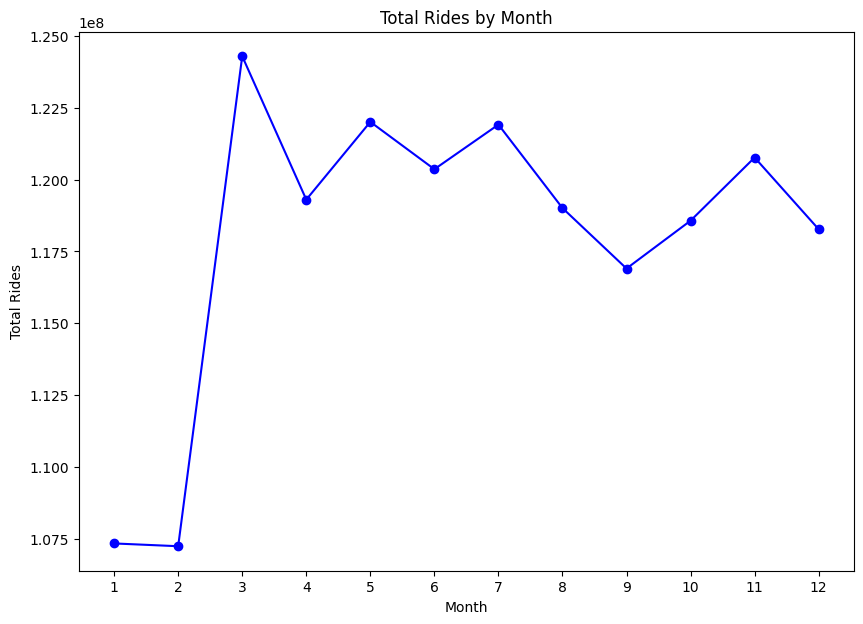

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(ride_df.index+1, ride_df['total_ride'], marker='o', linestyle='-', color='b', label='Total Rides')

plt.xticks(range(1, 13, 1))
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')

plt.show()

### 2) 하차 통계

In [19]:
takeoff_columns = ['month']
takeoff_columns += [col for col in data.columns if '_takeoff' in col]
takeoff = data[takeoff_columns]
takeoff.head(3)

,month,6~8_takeoff,8~10_takeoff,10~12_takeoff,12~14_takeoff,14~16_takeoff,16~18_takeoff,18~20_takeoff,20~22_takeoff
149250,202301,362,691,792,728,622,646,756,788
149251,202301,330,637,730,649,603,606,723,842
149252,202301,639,1281,1251,676,492,430,444,458


In [72]:
takeoff['total_takeoff'] = takeoff[['6~8_takeoff', '8~10_takeoff', '10~12_takeoff', '12~14_takeoff', '14~16_takeoff', '16~18_takeoff', '18~20_takeoff', '20~22_takeoff']].sum(axis=1)
takeoff_df = takeoff.drop(takeoff.columns.difference(['month', 'total_takeoff']), axis=1)
takeoff_df

,month,total_takeoff
149250,202301,5385
149251,202301,5120
149252,202301,5671
149253,202301,7139
149254,202301,5900
...,...,...
167245,202312,12
167246,202312,11
167247,202312,55
167248,202312,71


In [73]:
takeoff_df = takeoff_df.groupby('month')['total_takeoff'].sum().reset_index()

In [74]:
takeoff_df

,month,total_takeoff
0,202301,103828687
1,202302,103744637
2,202303,120427202
3,202304,115454353
4,202305,118082582
5,202306,116572312
6,202307,118030177
7,202308,115387401
8,202309,113097274
9,202310,114634862


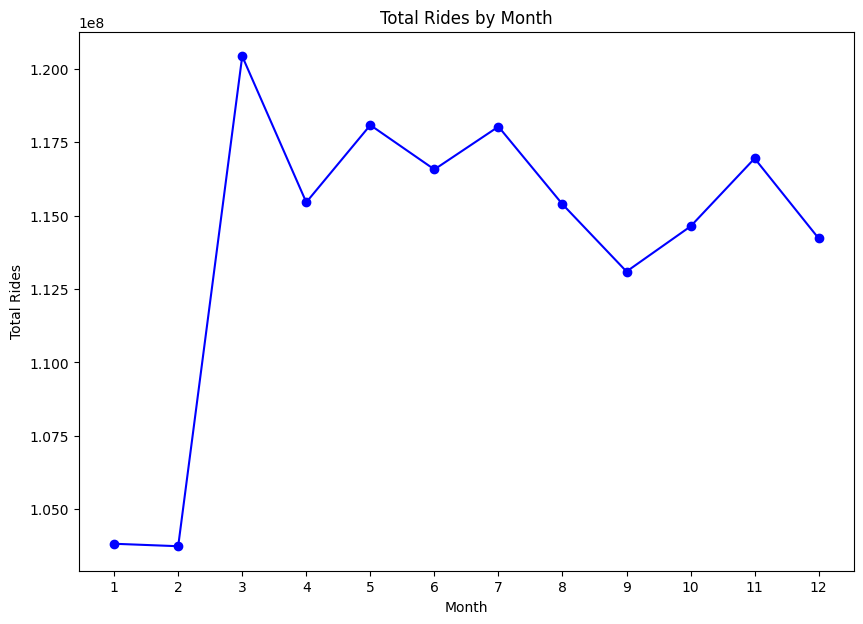

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(takeoff_df.index+1, takeoff_df['total_takeoff'], marker='o', linestyle='-', color='b', label='Total Rides')

plt.xticks(range(1, 13, 1))
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')

plt.show()

### 3) 승하차와 평균기온 & 강수량 상관 관계

In [108]:
result = pd.concat([weather['강수량(mm)'], weather['평균기온(℃)'], ride_df['total_ride'], takeoff_df['total_takeoff']], axis=1)
result = result.rename(columns={'강수량(mm)': 'rain', '평균기온(℃)': 'temp'})
result

,rain,temp,total_ride,total_takeoff
0,47.9,-1.5,107333667,103828687
1,1.0,2.3,107236913,103744637
2,10.5,9.8,124298855,120427202
3,96.9,13.8,119306011,115454353
4,155.6,19.5,122012586,118082582
5,195.6,23.4,120363978,116572312
6,459.9,26.7,121917929,118030177
7,298.1,27.2,119011513,115387401
8,134.5,23.7,116905929,113097274
9,31.0,15.8,118572626,114634862


표준 정규화 수행

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(result[['rain', 'temp', 'total_ride', 'total_takeoff']])

result =  pd.DataFrame(scaled_features, columns=['rain', 'temp', 'total_ride', 'total_takeoff'])

print(result)

        rain      temp  total_ride  total_takeoff
0  -0.669819 -1.578518   -2.070994      -2.064604
1  -1.037958 -1.192770   -2.089779      -2.081331
2  -0.963388 -0.431428    1.222866       1.238793
3  -0.285196 -0.025378    0.253485       0.249109
4   0.175566  0.553242    0.778977       0.772173
5   0.489543  0.949141    0.458893       0.471602
6   2.564151  1.284132    0.760599       0.761743
7   1.294111  1.334888    0.196307       0.235784
8   0.009943  0.979594   -0.212501      -0.219992
9  -0.802474  0.177647    0.111095       0.086016
10 -0.402938 -0.735965    0.537961       0.546340
11 -0.371540 -1.314585    0.053089       0.004367


꺾은선 그래프

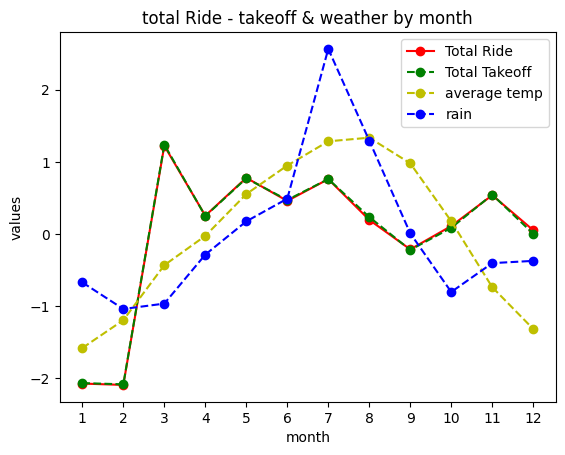

In [112]:
plt.plot(result.index+1, result['total_ride'], marker='o', linestyle='-', color='r', label='Total Ride')
plt.plot(result.index+1, result['total_takeoff'], marker='o', linestyle='--', color='g', label='Total Takeoff')
plt.plot(result.index+1, result['temp'], marker='o', linestyle='--', color='y', label='average temp')
plt.plot(result.index+1, result['rain'], marker='o', linestyle='--', color='b', label='rain')

plt.xticks(range(1, 13, 1))
plt.title('total Ride - takeoff & weather by month')
plt.xlabel('month')
plt.ylabel('values')
plt.legend()

plt.show()

heat 맵 그리기

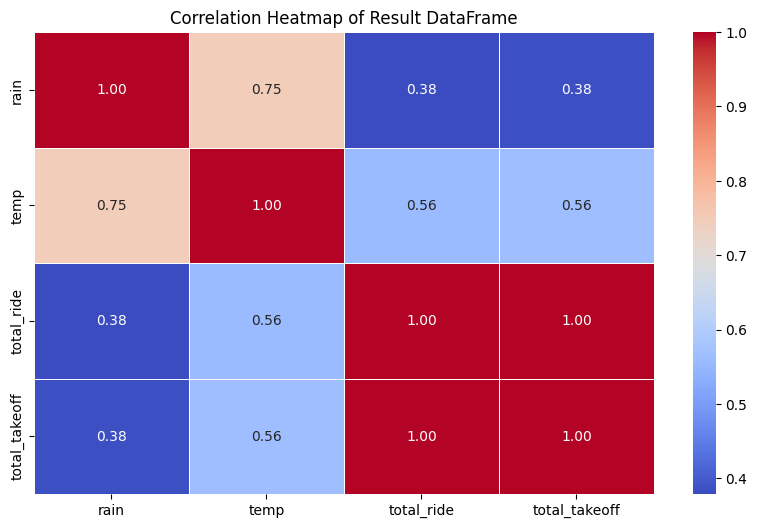

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(result.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Result DataFrame')
plt.show()